In [53]:
from netCDF4 import Dataset
from pyproj import Proj,transform
from mpl_toolkits.basemap import Basemap

### Notes:
#### Spatial Reference System 

***Problem:*** These data are likely in the HRAP grid (http://www.emc.ncep.noaa.gov/mmb/ylin/pcpanl/stage4/), which is hard to deal with. Basemap assumes data are WGS84 prior to projecting.

***Solution:*** Convert the included lat/lon arrays to WGS84, then define a Basemap projection and project the data to it. This is only really necessary to view the climatology in a geographically meaningful way. Found the proj4 strings for the HRAP grid here (http://polyploid.net/blog/?p=216), very similar to dealing with the WRF grids...

In [6]:
p1 = Proj('+proj=longlat +a=6371200 +b=6371200 +no_defs') # geographic projection for HRAP grid
p2 = Proj('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs') # WGS84 geographic projection

In [7]:
fl = './stage4_map_daily_20041220-20150107.nc'
ds = Dataset(fl,'r')

In [12]:
lats = np.array(ds.variables['lat'])
lons = np.array(ds.variables['lon'])

In [14]:
lons,lats = transform(p1,p2,lons,lats) # reproject the HRAP grid to WGS84

In [36]:
m,n = lons.shape

In [107]:
M = Basemap(resolution='i',llcrnrlon = lons.min()+15, llcrnrlat = lats.min()+2, urcrnrlon = lons.max(),
            urcrnrlat = lats.max()-10, projection='aea',lat_1=29.5,lat_2=45.5,
            lon_0=-96,lat_0=23)

x,y = M(lons,lats)

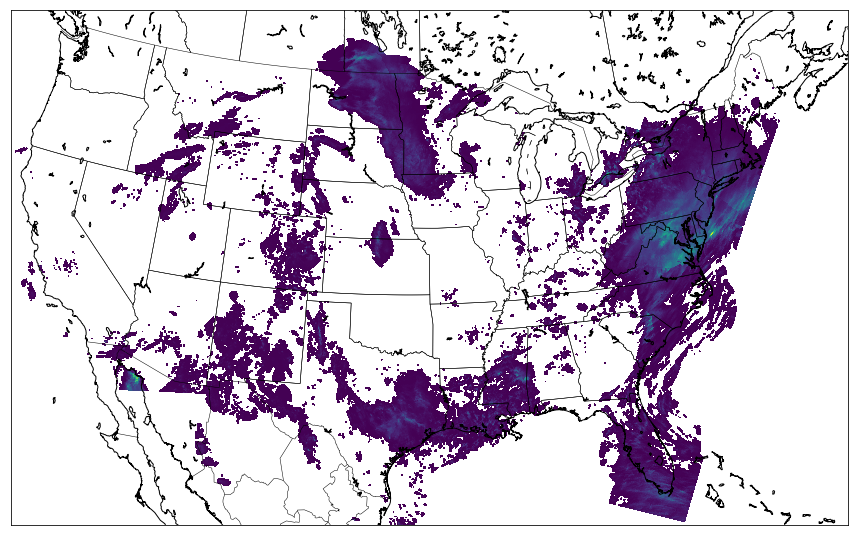

In [108]:
plt.figure(figsize=(15,10))
M.pcolormesh(x,y,p)
M.drawstates()
M.drawcoastlines()
M.drawcountries()

In [46]:
p = ds.variables['Total_precipitation_surface_1_Hour_Accumulation'][200,:,:]
p = np.ma.masked_array(p,p==0)

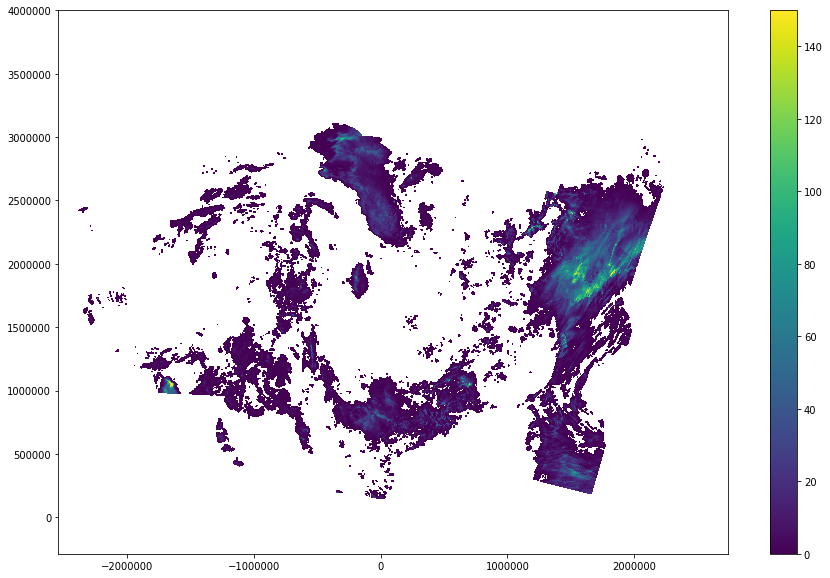

In [28]:
plt.figure(figsize=(15,10))
plt.pcolormesh(x,y,p,vmin=0,vmax=150,edgecolor=None)
plt.axis('equal')
plt.colorbar()

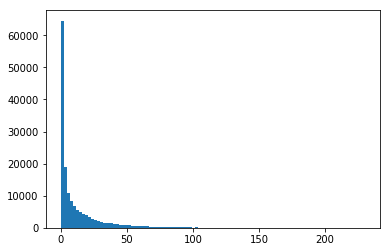

In [55]:
plt.hist(p[np.isnan(p) == 0],100);

In [17]:
p = ds.variables['']

ValueError: not enough values to unpack (expected 2, got 1)

In [12]:
lat

array([[ 23.11700058,  23.12473679,  23.13245583, ...,  19.8289032 ,
         19.81629753,  19.80368042],
       [ 23.14801979,  23.15576363,  23.1634903 , ...,  19.85694695,
         19.84432983,  19.83170319],
       [ 23.17904663,  23.1868    ,  23.19453239, ...,  19.88499641,
         19.87236977,  19.85973167],
       ..., 
       [ 53.43950653,  53.45954132,  53.47953796, ...,  45.61864471,
         45.59085846,  45.56306076],
       [ 53.47571564,  53.49577332,  53.51579666, ...,  45.64652252,
         45.61870956,  45.59088898],
       [ 53.51191711,  53.5320015 ,  53.55205154, ...,  45.67438507,
         45.64654922,  45.61870193]], dtype=float32)

In [5]:
ds.variables

OrderedDict([('Total_precipitation_surface_1_Hour_Accumulation',
              <class 'netCDF4._netCDF4.Variable'>
              float32 Total_precipitation_surface_1_Hour_Accumulation(time, y, x)
                  long_name: Total precipitation (1_Hour Accumulation) @ Ground or water surface
                  units: kg m^-2
                  coordinates: lat lon
                  _FillValue: nan
                  missing_value: nan
                  description: Total precipitation
              unlimited dimensions: time
              current shape = (3669, 881, 1121)
              filling on),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(y, x)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  _CoordinateAxisType: Lat
              unlimited dimensions: 
              current shape = (881, 1121)
              filling on, default _FillValue of 9.969209968386869e

In [10]:
ds.GetGCPProjection()

''

In [12]:
ds.GetMetadata_List()

['NC_GLOBAL#CDI=Climate Data Interface version 1.8.1 (http://mpimet.mpg.de/cdi)',
 'NC_GLOBAL#CDO=Climate Data Operators version 1.8.1rc2 (http://mpimet.mpg.de/cdo)',
 'NC_GLOBAL#cdo_openmp_thread_number=4',
 'NC_GLOBAL#Conventions=CF-1.6',
 'NC_GLOBAL#featureType=GRID',
 'NC_GLOBAL#frequency=day',
 'NC_GLOBAL#Generating_process_or_model=River Forecast Center Quantitative Precipitation estimate mosaic generated by NCEP',
 'NC_GLOBAL#history=Wed Mar 29 09:13:29 2017: ncks -4 -L 1 --cnk_plc cnk_nco stage4_map_daily.nc stage4_map_daily_nc4.nc\nWed Mar 29 07:43:14 2017: cdo -v -P 4 daysum stage4_map_026-113.nc stage4_map_daily.nc\nWed Mar 29 06:54:24 2017: ncrcat stage4_map_026.nc stage4_map_027.nc stage4_map_028.nc stage4_map_029.nc stage4_map_030.nc stage4_map_031.nc stage4_map_032.nc stage4_map_033.nc stage4_map_034.nc stage4_map_035.nc stage4_map_036.nc stage4_map_037.nc stage4_map_038.nc stage4_map_039.nc stage4_map_040.nc stage4_map_041.nc stage4_map_042.nc stage4_map_043.nc stage4_m

In [ ]:
offset = ds

In [20]:
meta = ds.GetMetadata_Dict()

In [21]:
offset = meta['time#units']

In [25]:
pd.date_range(start=offset[-18:], freq='H', periods=10)

DatetimeIndex(['2031-01-12 23:00:00+00:00', '2031-01-13 00:00:00+00:00',
               '2031-01-13 01:00:00+00:00', '2031-01-13 02:00:00+00:00',
               '2031-01-13 03:00:00+00:00', '2031-01-13 04:00:00+00:00',
               '2031-01-13 05:00:00+00:00', '2031-01-13 06:00:00+00:00',
               '2031-01-13 07:00:00+00:00', '2031-01-13 08:00:00+00:00'],
              dtype='datetime64[ns, tzutc()]', freq='H')

In [24]:
offset[-18:]

'01-12-31T23:00:00Z'